<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/adding_C4/C4/W4/ungraded_labs/C4_W4_Lab_2_Sunspots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [ ]:
#!pip install tensorflow==2.5.0

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

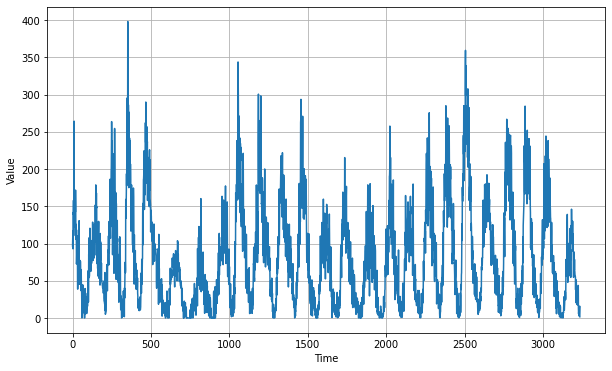

In [4]:
import csv
time_step = []
sunspots = []

with open('./Sunspots.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    sunspots.append(float(row[2]))
    time_step.append(int(row[0]))

series = np.array(sunspots)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

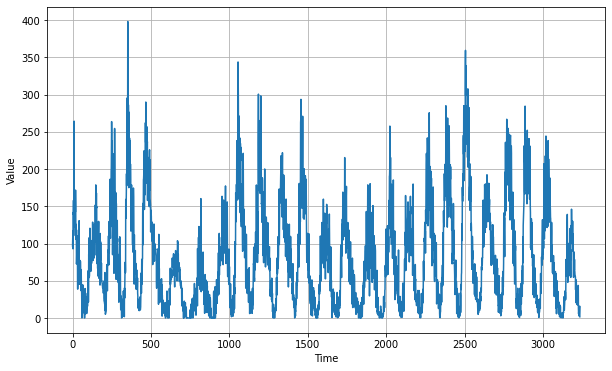

In [5]:
series = np.array(sunspots)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [6]:
split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000


In [7]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [8]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [9]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Epoch 47/100
12/12 [==============================] - 2s 158ms/step - loss: 23.2294 - mae: 23.7235 - lr: 1.9953e-06
Epoch 48/100
12/12 [==============================] - 2s 156ms/step - loss: 22.9687 - mae: 23.4627 - lr: 2.2387e-06
Epoch 49/100
12/12 [==============================] - 2s 162ms/step - loss: 22.7296 - mae: 23.2236 - lr: 2.5119e-06
Epoch 50/100
12/12 [==============================] - 2s 182ms/step - loss: 22.3836 - mae: 22.8776 - lr: 2.8184e-06
Epoch 51/100
12/12 [==============================] - 2s 163ms/step - loss: 22.1498 - mae: 22.6436 - lr: 3.1623e-06
Epoch 52/100
12/12 [==============================] - 2s 164ms/step - loss: 22.1633 - mae: 22.6573 - lr: 3.5481e-06
Epoch 53/100
12/12 [==============================] - 2s 158ms/step - loss: 21.6053 - mae: 22.0991 - lr: 3.9811e-06
Epoch 54/100
12/12 [==============================] - 2s 151ms/step - loss: 21.2737 - mae: 21.7673 - lr: 4.4668e-06
Epoch 55/100
12/12 [==============================] - 2s 166ms/step - lo

(1e-08, 0.0001, 0.0, 60.0)

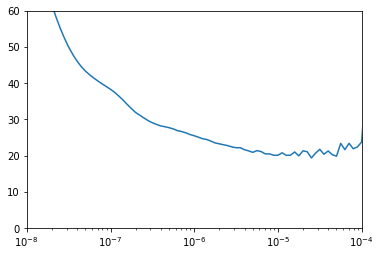

In [10]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

In [11]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])


optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=500)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

30/30 [==============================] - 3s 96ms/step - loss: 16.0817 - mae: 16.5703
Epoch 140/500
30/30 [==============================] - 3s 98ms/step - loss: 16.0245 - mae: 16.5129
Epoch 141/500
30/30 [==============================] - 3s 96ms/step - loss: 16.0640 - mae: 16.5529
Epoch 142/500
30/30 [==============================] - 3s 97ms/step - loss: 16.1446 - mae: 16.6335
Epoch 143/500
30/30 [==============================] - 3s 96ms/step - loss: 16.5099 - mae: 16.9991
Epoch 144/500
30/30 [==============================] - 3s 95ms/step - loss: 16.1013 - mae: 16.5899
Epoch 145/500
30/30 [==============================] - 3s 97ms/step - loss: 15.9956 - mae: 16.4841
Epoch 146/500
30/30 [==============================] - 3s 96ms/step - loss: 16.0636 - mae: 16.5520
Epoch 147/500
30/30 [==============================] - 3s 96ms/step - loss: 16.0422 - mae: 16.5308
Epoch 148/500
30/30 [==============================] - 3s 96ms/step - loss: 15.9763 - mae: 16.4644
Epoch 149/500
30/30 [===

30/30 [==============================] - 3s 98ms/step - loss: 15.3283 - mae: 15.8151
Epoch 304/500
30/30 [==============================] - 3s 98ms/step - loss: 15.3953 - mae: 15.8822
Epoch 305/500
30/30 [==============================] - 3s 98ms/step - loss: 15.2581 - mae: 15.7445
Epoch 306/500
30/30 [==============================] - 3s 98ms/step - loss: 15.2415 - mae: 15.7287
Epoch 307/500
30/30 [==============================] - 3s 100ms/step - loss: 15.4600 - mae: 15.9469
Epoch 308/500
30/30 [==============================] - 3s 98ms/step - loss: 15.4157 - mae: 15.9028
Epoch 309/500
30/30 [==============================] - 3s 98ms/step - loss: 15.3531 - mae: 15.8399
Epoch 310/500
30/30 [==============================] - 3s 98ms/step - loss: 15.2621 - mae: 15.7488
Epoch 311/500
30/30 [==============================] - 3s 97ms/step - loss: 15.1959 - mae: 15.6824
Epoch 312/500
30/30 [==============================] - 3s 97ms/step - loss: 15.3728 - mae: 15.8601
Epoch 313/500
30/30 [==

30/30 [==============================] - 3s 109ms/step - loss: 14.6106 - mae: 15.0959
Epoch 468/500
30/30 [==============================] - 4s 112ms/step - loss: 14.5660 - mae: 15.0516
Epoch 469/500
30/30 [==============================] - 3s 100ms/step - loss: 14.5455 - mae: 15.0306
Epoch 470/500
30/30 [==============================] - 3s 101ms/step - loss: 14.5683 - mae: 15.0535
Epoch 471/500
30/30 [==============================] - 3s 99ms/step - loss: 14.8446 - mae: 15.3312
Epoch 472/500
30/30 [==============================] - 3s 99ms/step - loss: 14.7748 - mae: 15.2610
Epoch 473/500
30/30 [==============================] - 3s 99ms/step - loss: 14.5992 - mae: 15.0851
Epoch 474/500
30/30 [==============================] - 3s 100ms/step - loss: 14.5045 - mae: 14.9896
Epoch 475/500
30/30 [==============================] - 3s 100ms/step - loss: 14.5826 - mae: 15.0682
Epoch 476/500
30/30 [==============================] - 3s 99ms/step - loss: 14.4924 - mae: 14.9774
Epoch 477/500
30/3

In [12]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

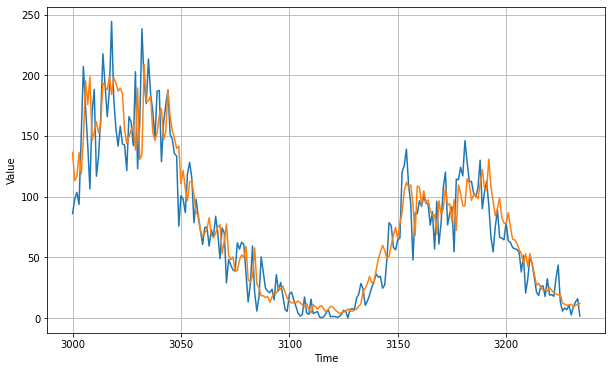

In [13]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [14]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

15.524244

<Figure size 432x288 with 0 Axes>

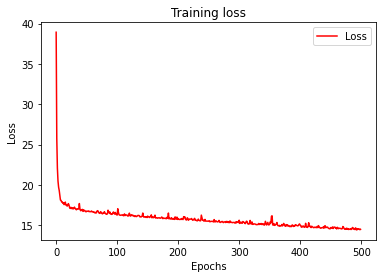

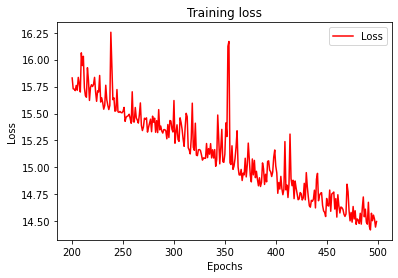

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()



zoomed_loss = loss[200:]
zoomed_epochs = range(200,500)


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(zoomed_epochs, zoomed_loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()

In [16]:
print(rnn_forecast)

[136.41125   113.26167   116.565994  136.18712   118.67002   147.96075
 195.2945    175.87433   198.65294   146.3088    153.20215   161.62944
 152.46645   159.5649    193.66713   190.71486   188.07925   198.90182
 184.11018   197.97273   193.77036   186.89175   189.35616   185.05003
 155.2286    143.76326   148.79341   155.07477   158.24034   138.3366
 189.3754    130.61375   134.65071   208.889     178.57123   178.81961
 182.91173   153.27992   146.31934   152.63379   166.9008    172.73598
 146.96605   154.13416   187.76529   165.83244   154.496     147.897
 139.79408   141.60297   110.5803    121.471405  106.65889    96.7303
 112.06258   112.839195  101.531555   86.26183    85.44228    71.68369
  67.48312    70.034065   73.28976    82.555756   68.43079    66.032455
  69.8332     74.91478    76.8546     52.944885   63.718605   77.50978
  51.275764   48.07757    50.311077   38.571564   39.177483   47.81149
  51.898384   50.094723   59.046997   31.674522   29.575413   34.129585
  57.710